# **Forecasting the CocaCola prices  data set.**

**Importing Packeges**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [ ]:
#ARIMA
!pip install pmdarima

In [ ]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


**Visualization**

<Axes: >

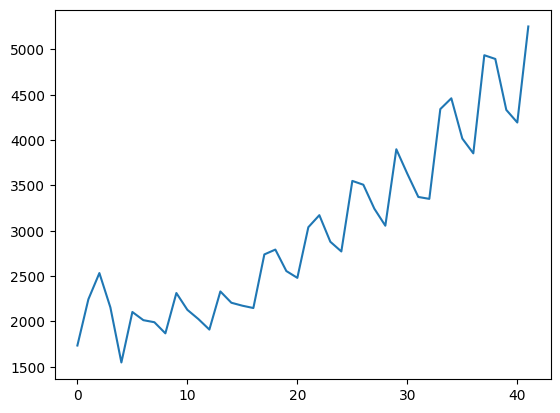

In [ ]:
df.Sales.plot()

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

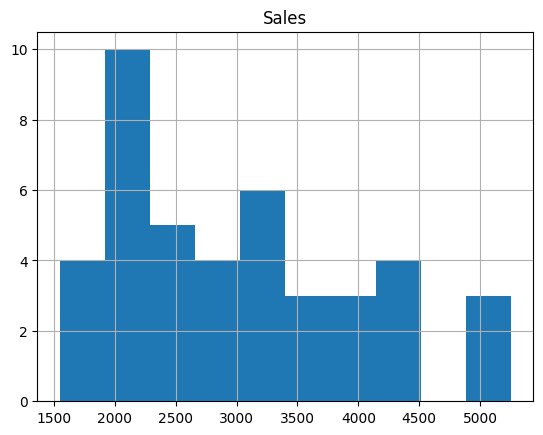

In [ ]:
df.hist()

<Axes: ylabel='Density'>

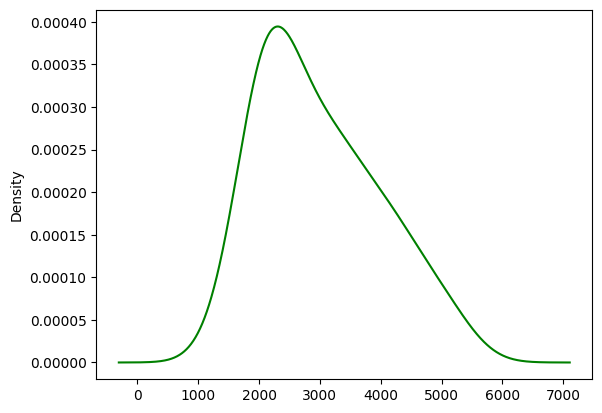

In [ ]:
df.Sales.plot.density(color='green')

<Axes: xlabel='Sales'>

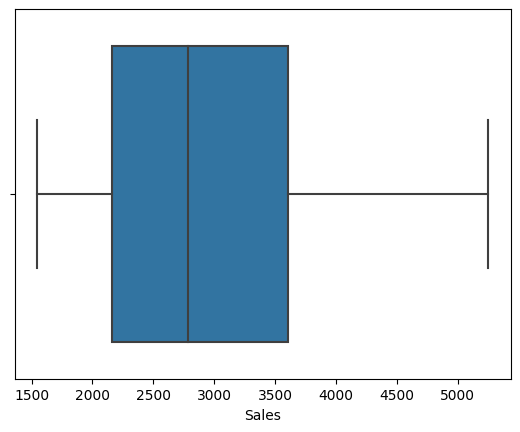

In [ ]:
#sns.load_dataset(df)
sns.boxplot(x=df["Sales"])

**EMA**

In [ ]:
df['quarter'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

<ipython-input-43-bca6adf2edda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i]=p[0:2]


In [ ]:
df['Year'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['Year'][i]='19'+p[3:5]

<ipython-input-44-aa1f86450fb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][i]='19'+p[3:5]


In [ ]:
df

,Quarter,Sales,quarter,Year
0,Q1_86,1734.827000,Q1,1986
1,Q2_86,2244.960999,Q2,1986
2,Q3_86,2533.804993,Q3,1986
3,Q4_86,2154.962997,Q4,1986
4,Q1_87,1547.818996,Q1,1987
5,Q2_87,2104.411995,Q2,1987
6,Q3_87,2014.362999,Q3,1987
7,Q4_87,1991.746998,Q4,1987
8,Q1_88,1869.049999,Q1,1988
9,Q2_88,2313.631996,Q2,1988


In [ ]:
df.quarter.value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [ ]:
df_dummies=pd.DataFrame(pd.get_dummies(df['quarter']),columns=['Q1','Q2','Q3','Q4'])
df=pd.concat([df,df_dummies],axis= 1)

In [ ]:
df.head()

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1986,1,0,0,0
1,Q2_86,2244.960999,Q2,1986,0,1,0,0
2,Q3_86,2533.804993,Q3,1986,0,0,1,0
3,Q4_86,2154.962997,Q4,1986,0,0,0,1
4,Q1_87,1547.818996,Q1,1987,1,0,0,0


In [ ]:
df['t'] = np.arange(1,43)
df['t_squared'] = df['t']**2
df["log_Sales"] =np.log(df['Sales'])

In [ ]:
df.head()

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1986,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,1986,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,1986,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,1986,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1987,1,0,0,0,5,25,7.344602


**Data Spliting**

In [ ]:
train = df.head(30)
test = df.tail(12)

In [ ]:
#Linear Model
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Sales'],pred_linear))
rmse_linear

714.0144483281299

In [ ]:
#Exponential Model
exp = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Sales'],pred_exp))
rmse_exp

4252.188990972336

In [ ]:
#Quadratic Model
quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad = np.sqrt(mean_squared_error(test['Sales'],pred_quad))
rmse_quad


646.2715428311304

In [ ]:
def ad_test(dataset):
  dftest = adfuller(dataset,autolag='AIC')
  #AIC is the number which will help me to tell whether model is performing good or not. (Not much imp. here. We will see it in ARIMA)
  print("P-Value: ", dftest[1])# dftest[1]: index of p-value is 1.

ad_test(df['Sales'])


P-Value:  0.9966611673930905


Here p-value is approximately = 1. Here p>0.05. So Data is not Stationary.

So we can not build ARIMA model.



In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad",]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,646.271543
0,rmse_linear,714.014448
1,rmse_exp,4252.188991


**Quadratic Model has least RMSE value. therefore Quadratic Model is preffered.**

# **Forecasting Airlines Passengers data set.**

In [ ]:
dff = pd.read_excel("/content/Airlines+Data.xlsx",index_col='Month',parse_dates=True)

In [ ]:
dff.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


# **Visualization**

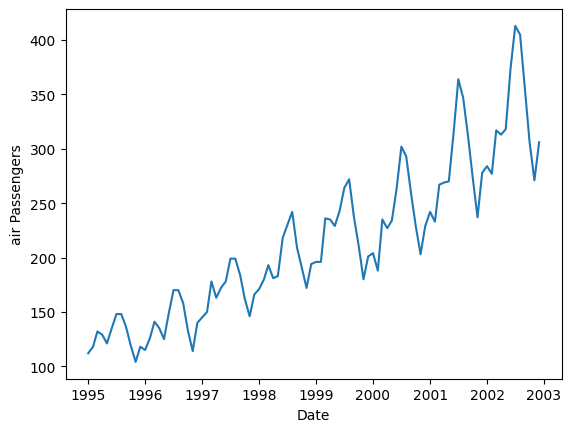

In [ ]:
plt.xlabel('Date')
plt.ylabel("air Passengers")
plt.plot(dff)

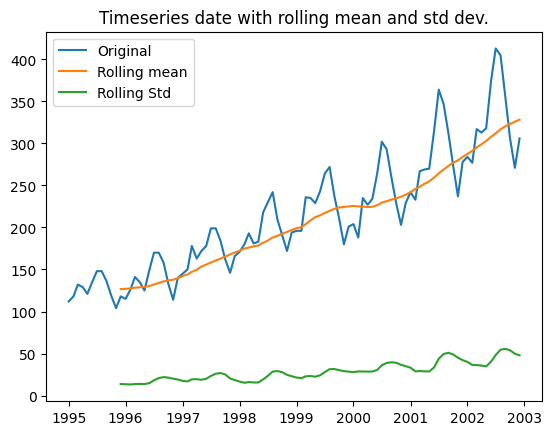

(1.3402479596467138, 0.9968250481137263, 12, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 626.0084713813505)


In [ ]:
def test_stationarity(timeseries):
  rolmean =  timeseries.rolling(window=12).mean()
  rolstd = timeseries.rolling(window=12).std()

  orig = plt.plot(timeseries,label='Original')
  mean = plt.plot(rolmean,label='Rolling mean')
  std = plt.plot(rolstd, label='Rolling Std')

  plt.legend(loc='best')
  plt.title("Timeseries date with rolling mean and std dev.")
  plt.show()

  dftest = adfuller(timeseries)
  print(dftest)

test_stationarity(dff)



from the graph, rolling mean has trend component and Rolling standard deviation is fairly constant with time.

for our time series to be stationary, need to ensure that both the rolling statistics remain time invariant

As P-value > 0.05, data is not stationary, we need to transform it.

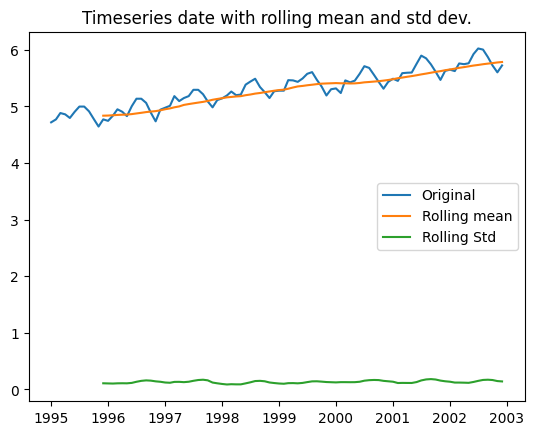

(-0.7230267542465425, 0.8406945968114737, 12, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, -257.8406094033169)


In [ ]:
df_log_scale = np.log(dff)
test_stationarity(df_log_scale)

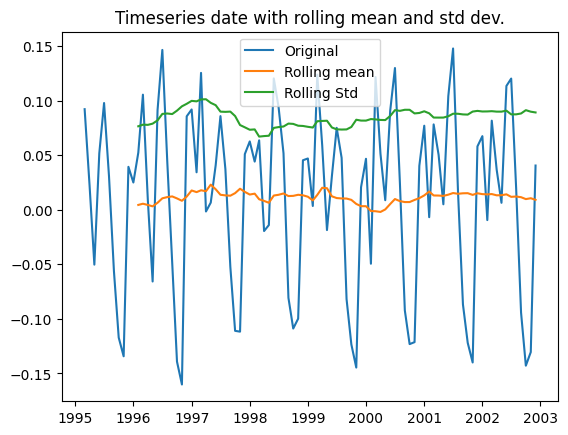

(-2.665470303200836, 0.08020636318684643, 11, 82, {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}, -322.3868276325298)


In [ ]:
ma = df_log_scale.rolling(window=3).mean()
df_log_scale_ma_diff = df_log_scale - ma
df_log_scale_ma_diff.dropna(inplace=True)
test_stationarity(df_log_scale_ma_diff)

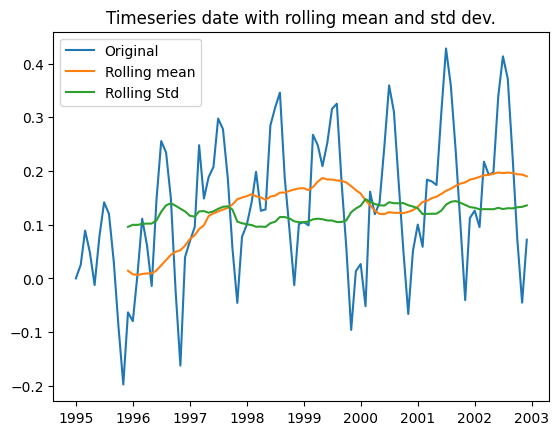

(-2.835036332481287, 0.05344073374466823, 12, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, -268.6989923054523)


In [ ]:
exp_data=df_log_scale.ewm(halflife=12, min_periods=0, adjust=True).mean()
exp_data_diff=df_log_scale-exp_data
test_stationarity(exp_data_diff)

As P_value ~ 0.05, data is stationary, we can use this data for further analysis.

# **ARIMA Model building**

In [ ]:
stepwise_fit = auto_arima(dff['Passengers'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=871.345, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=867.283, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=863.757, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=870.076, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=862.193, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=861.773, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=860.702, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=862.251, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=855.919, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=860.821, Time=0.08 sec
 A

Best Model P:3, d:1, q:2

In [ ]:
exp_data_diff.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(exp_data_diff, test_size=0.10, shuffle=False)

In [ ]:
model_arima = ARIMA(train, order=(20,1,2))
model = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

In [ ]:
test

,Passengers
Month,
2002-03-01,0.217308
2002-04-01,0.193054
2002-05-01,0.197109
2002-06-01,0.339034
2002-07-01,0.413502
2002-08-01,0.371721
2002-09-01,0.226422
2002-10-01,0.073498
2002-11-01,-0.045265


In [ ]:
pred = model.predict(start = '2002-03-01', end="2002-12-01")

In [ ]:
from math import sqrt
test['Passengers'].mean()
rmse=sqrt(mean_squared_error(pred,test['Passengers']))
print(rmse)

0.022198514603513807


In [ ]:
pred

2002-03-01    0.176530
2002-04-01    0.179743
2002-05-01    0.181182
2002-06-01    0.309761
2002-07-01    0.413098
2002-08-01    0.338167
2002-09-01    0.229568
2002-10-01    0.096997
2002-11-01   -0.032674
2002-12-01    0.083326
Freq: MS, Name: predicted_mean, dtype: float64

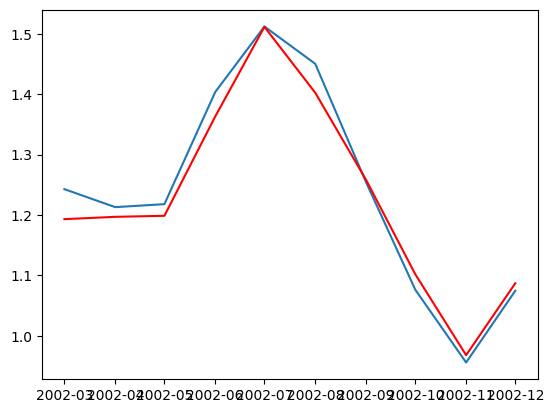

In [ ]:
predict = np.exp(pred)
test_set = np.exp(test)

plt.plot(test_set)
plt.plot(predict,color='red')
plt.show()

**Hence by using ARIMA MODEL we can conduct forcasting**